In [197]:
import pandas as pd
import numpy as np
import statistics

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble

# Linear Regression
from sklearn import  linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Evaluation
from sklearn.metrics import confusion_matrix

## 1. Data Pre-Processing/Cleaning

#### Data Reading and Overview

In [112]:
df=pd.read_csv("census_income_data.csv")
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [113]:
df.shape

(48842, 15)

#### Data Type Overview

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Check for Missing Values

In [115]:
df.isnull().values.sum()

0

### Visualizations on some features

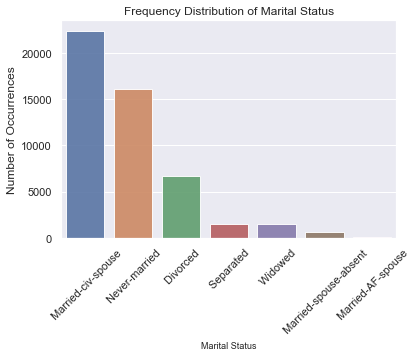

In [116]:
%matplotlib inline
marital_status = df['marital_status'].value_counts()
sns.set(style="darkgrid")
sns.barplot(marital_status.index, marital_status.values, alpha=0.9)
plt.xticks(rotation=45)
plt.title('Frequency Distribution of Marital Status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Marital Status', fontsize=9)
plt.show()

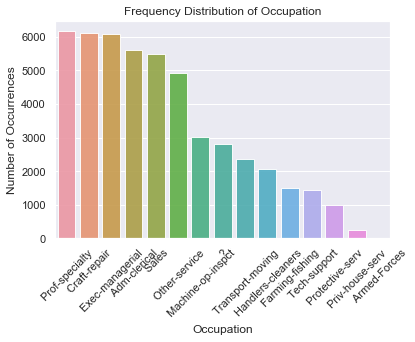

In [117]:
#occupation
%matplotlib inline
occupation = df['occupation'].value_counts()
sns.set(style="darkgrid")
sns.barplot(occupation.index, occupation.values, alpha=0.9)
plt.xticks(rotation=45)
plt.title('Frequency Distribution of Occupation')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.show()

### Data Cleaning

#### Feature Selection

In [120]:
df=df.drop(["fnlwgt","education"], axis=1)

#### Target Variable Overview
Problem: Same class is coded differently

In [121]:
df.groupby("income").count()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
income,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
<=50K.,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841
>50K.,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846


#### Cleaning Target Variable
##### The Problem

In [122]:
# The Problem
df.groupby("income").mean()

,age,education_num,capital_gain,capital_loss,hours_per_week
income,,,,,
<=50K,36.783738,9.595065,148.752468,53.142921,38.840210
<=50K.,37.048010,9.605308,143.547004,56.157780,38.839727
>50K,44.249841,11.611657,4006.142456,195.001530,45.473026
>50K.,44.326833,11.584763,4115.832033,190.526781,45.411856


##### The Solution

In [123]:
#The solution
df["income"] = df["income"].astype('category')
df["income"] = df["income"].cat.codes
df.loc[df.income==1, 'income'] = 0
df.loc[df.income==2, 'income'] = 1
df.loc[df.income==3, 'income'] = 1
df["income"] = df["income"].astype('category')
df.groupby("income").mean()

,age,education_num,capital_gain,capital_loss,hours_per_week
income,,,,,
0,36.872184,9.598493,147.010308,54.151931,38.840048
1,44.275178,11.602807,4042.239497,193.528964,45.452896


### Transforming categorical features

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
age               48842 non-null int64
workclass         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null category
dtypes: category(1), int64(5), object(7)
memory usage: 4.5+ MB


In [125]:
categoricals=df.select_dtypes(include="object").columns 
df=pd.get_dummies(df,columns=categoricals,drop_first=True)

In [126]:
columns = df.columns.tolist()
columns.remove("income")
columns.append("income")

In [127]:
df=df[columns]
df.shape

(48842, 85)

#### Standardize Numerical Variable

In [ ]:
numericals=df.select_dtypes(include="int64").columns
df[numericals] = StandardScaler().fit_transform(df[numericals])

In [129]:
df.head(3)

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income
0,0.025996,1.136512,0.146932,-0.217127,-0.034087,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.828308,1.136512,-0.144804,-0.217127,-2.213032,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.046942,-0.419335,-0.144804,-0.217127,-0.034087,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## Summary Data Processing
- 2 variables are dropped because they are (1) irrelevant: "fnlwgt" or (2) redundant: "education"
- the Target variable is unified and transformed to a dummy
- all numerical variables are standarized
- all categorical variables are transformed into dummy variables with m-1 columns for m manifestations

### Linear Regression for Variable Effect Overview

In [99]:
X=df.loc[:,df.columns!="income"]   
y=df["income"]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     333.9
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:21:55   Log-Likelihood:                -16708.
No. Observations:               48842   AIC:                         3.358e+04
Df Residuals:                   48758   BIC:                         3.432e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

## 2. Prediction
This is a supervised 2-class classification problem.
### 2.1 Comparison of Default Models
Five different models in their default setting are trained on a train set (80%) and evaluated on the test set (20%) with their prediction accuracy.

In [135]:
def prediction(df, model="logit", seed=1):
    '''This function returns the accuracy of a 
    prediction dependent on the model used.'''
    
    # Create Train and Test Sets
    X=df.loc[:,df.columns!="income"]
    y=df["income"].values.ravel()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
    
    # Select Model
    if model=="Logit":
        model= LogisticRegression(random_state=1, solver='liblinear')#regularization is applied by default
    elif model=="Naive Bayes":
        model= GaussianNB()
    elif model=="Multi-layer Perceptron":
        model= MLPClassifier()
    elif model=="Ridge Classifier":
        model= RidgeClassifierCV()
    elif model=="Gradient Boosting":
        model= ensemble.GradientBoostingClassifier()
    
    # Fit Model and Return Accuracy
    model.fit(X_train, y_train)
    accuracy=model.score(X_test,y_test)
    return(accuracy)

#### The results are illustrated in a table

In [131]:
def create_results(result_table,n,model):
    '''This functions shows the mean accuracy (and its variance)
    over n different train-test-splits.'''
    
    acc=[]
    for seed in range(n):
        acc_n=prediction(df,seed=seed,model=model)
        acc.append(acc_n)
    mean = sum(acc)/len(acc)
    sd = statistics.stdev(acc)
    result_table.loc[model,"Mean"] = mean
    result_table.loc[model,"SD"] = sd
    return(result_table)

In [ ]:
columns=["Mean", "SD"]
models=["Naive Bayes",
        "Logit",
        "Ridge Classifier",
        "Gradient Boosting",
        "Multi-layer Perceptron"]
result_df=pd.DataFrame(columns=columns, index=models)
for model in models:
    results=create_results(result_df,10,model)

### Results with default parameters

In [133]:
result_df

,Mean,SD
Naive Bayes,0.58007,0.026521
Logit,0.851377,0.00390552
Ridge Classifier,0.840874,0.00274896
XGB,0.867407,0.00288284
MLP,0.850537,0.00539972


### 2.2 Manual Optimization of Parameters for Gradient Boost Model
Since the Gradient Boosting Classifier has 2 percentage points higher accuracy than the other classifiers in its default settings, this classifier is further optimized. (It is possible that another classifier is even superior when optimized in its parameters.)
##### The following parameters are chosen for a simultaneous optimization
- subsample (default 1.0) "Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias"
- max_depth (default 3) "The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables."

from its [scikit-learn documentation](https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [166]:
subsamples=["0.3", "0.6", "1"]
max_depths=["1","2","3","6","9"]
parameter_selection_1=pd.DataFrame(columns=subsamples, index=max_depths)
parameter_selection_1

,0.3,0.6,1
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
6,NaN,NaN,NaN
9,NaN,NaN,NaN


In [ ]:
def gradient_boost(dataframe,n,subsample=subsample, max_depth = max_depth):
    '''This function returns the accuracy of a 
    gradient boost prediction dependent on the 
    parameters subsample and max_depth used.'''
    X   = df.loc[:,df.columns!="income"]
    y   = df["income"].values.ravel()    
    acc = []
    for seed in range(n):
        # Create Train and Test Sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

        # Set Parameters
        model = ensemble.GradientBoostingClassifier(subsample=subsample,max_depth=max_depth)

        # Fit Model and Return Accuracy
        model.fit(X_train, y_train)
        accuracy = model.score(X_test,y_test)
        acc.append(accuracy)
    mean_accuracy = sum(acc)/len(acc)
    return(mean_accuracy)

In [ ]:
for subsample in subsamples:
    print(subsample)
        for max_depth in max_depths:
            subsample_num = float(subsample)
            max_depth_num = float(max_depth)
            result=gradient_boost(dataframe=df, n=3, subsample=subsample_num, max_depth=max_depth_num)
            print(result)
            parameter_selection_1.loc[max_depth,subsample]=result

In [187]:
parameter_selection_1

,0.3,0.6,1
1,0.85471,0.855222,0.855666
2,0.861876,0.861774,0.861228
3,0.866073,0.867677,0.867506
6,0.870782,0.873,0.873921
9,0.868496,0.870202,0.871259


##### Zooming closer to the optimal area

In [ ]:
subsamples_2 = ["0.5","0.75","0.9","1"]
max_depths_2 = ["5","6","7","8"]
parameter_selection_2=pd.DataFrame(columns=subsamples_2, index=max_depths_2)
for subsample in subsamples_2:
    print(subsample)
    for max_depth in max_depths_2:
        subsample_num = float(subsample)
        max_depth_num = int(max_depth)
        result=gradient_boost(dataframe=df, n=3, subsample=subsample_num, max_depth=max_depth_num)
        print(result)
        parameter_selection_2.loc[max_depth,subsample]=result

In [191]:
parameter_selection_2

,0.5,0.75,0.9,1
5,0.872215,0.872863,0.873341,0.872761
6,0.872283,0.873307,0.873546,0.873443
7,0.873068,0.873136,0.873716,0.873068
8,0.870782,0.871737,0.872693,0.872658


#### Result
The results do not change much in these areas of the two considered parameters. We chose 0.9 for subsample and and 7 for the maximal depth as this results in the highest accuracy of **0.8737**.

##### Iterative Optimization Approach
After the simultaneous optimization in a two-dimensional space, another, third, parameter (*min_impurity_decrease*) is optimized at the optimum of the first two parameters. (It is possible that the overall optimum of these three parameters is different from this result. The computational costs are significantly lower for the iterative optimization though.) 

In [196]:
min_impurity_decreases = [0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01]
test_acc = []
for min_impurity_decrease in min_impurity_decreases:
    X  = df.loc[:,df.columns!="income"]
    y  = df["income"].values.ravel() 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    model = ensemble.GradientBoostingClassifier(subsample=0.9, max_depth=7, min_impurity_decrease=min_impurity_decrease)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test,y_test)
    test_acc.append(accuracy)

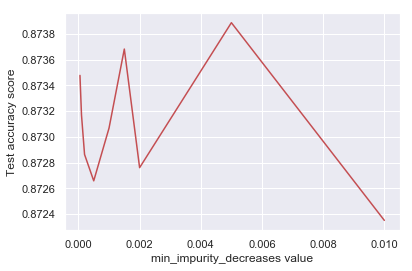

In [203]:
plt.plot(min_impurity_decreases, test_acc, "r")
plt.ylabel("Test accuracy score")
plt.xlabel("min_impurity_decreases value")
plt.show()

There does not seem to be a significant change corresponding to the min_impurity_decrease variable. The fluctuations indicate a lack of significance. Nevertheless, we chose 0.005 as it leads to the maximal accuracy.

#### Final Model and Result

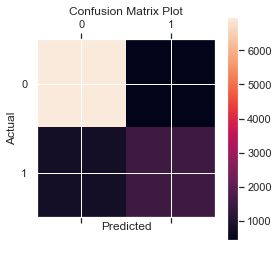

In [209]:
model = ensemble.GradientBoostingClassifier(subsample=0.9, max_depth=7, min_impurity_decrease=0.005)
y_pred = model.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.title('Confusion Matrix Plot',y=1.1)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [207]:
accuracy = model.score(X_test,y_test)
accuracy

0.8725560446309756